In [9]:
import requests
import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection
model_id = "IDEA-Research/grounding-dino-tiny"
device = "cuda"
processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)


Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAt

prompt: red areas


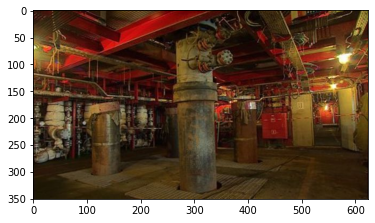

In [14]:
# load image and show it
import matplotlib.pyplot as plt
image = Image.open("car.jpg")
prompt = "tires"
print("prompt: "+prompt)
plt.imshow(image)
plt.show()


In [15]:

# Check for cats and remote controls
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)
    results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.4,
    text_threshold=0.3,
    target_sizes=[image.size[::-1]]
    )
    print(results)

[{'scores': tensor([], device='cuda:0'), 'labels': [], 'boxes': tensor([], device='cuda:0', size=(0, 4))}]
